In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv(r'D:\data science\set\titanic_toy12.csv')

In [4]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [5]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [8]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [11]:
x_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [12]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()

mean_fare=x_train['Fare'].mean()
median_fare=x_train['Fare'].median()

In [13]:
x_train['Age_median']=x_train['Age'].fillna(median_age)
x_train['Age_mean']=x_train['Age'].fillna(mean_age)

x_train['Fare_median']=x_train['Fare'].fillna(median_fare)
x_train['Fare_mean']=x_train['Fare'].fillna(mean_fare)

In [14]:
x_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
791,16.0,26.00,0,16.0,16.0,26.00,26.00
226,19.0,10.50,0,19.0,19.0,10.50,10.50
820,52.0,93.50,2,52.0,52.0,93.50,93.50
27,19.0,263.00,5,19.0,19.0,263.00,263.00
558,39.0,79.65,2,39.0,39.0,79.65,79.65


In [15]:
print('original Age variable variance:',x_train['Age'].var())
print('Age variance after median imputation:',x_train['Age_median'].var())
print('Age variance after mean imputation:',x_train['Age_mean'].var())

print('original fare variable variance:',x_train['Fare'].var())
print('Fare varianve after mean imputation:',x_train['Fare_median'].var())
print('Fare vasriance after mean imputation:',x_train['Fare_mean'].var())

original Age variable variance: 204.3495133904614
Age variance after median imputation: 161.9895663346054
Age variance after mean imputation: 161.81262452718673
original fare variable variance: 2448.197913706318
Fare varianve after mean imputation: 2340.0910219753637
Fare vasriance after mean imputation: 2324.2385256705547


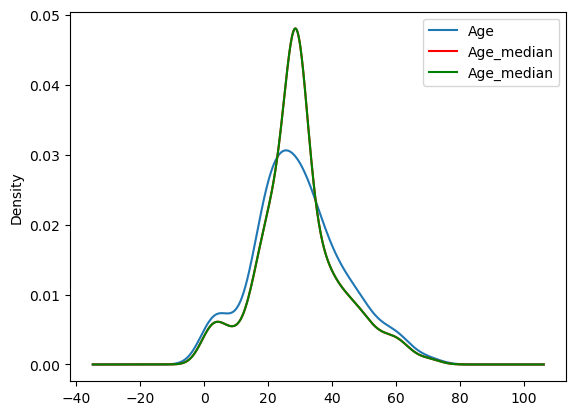

In [16]:
fig=plt.figure()
ax=fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde',ax=ax)


# variable imputed eith the median
x_train['Age_median'].plot(kind='kde',ax=ax,color='red')

# varible imputed with the mean
x_train['Age_median'].plot(kind='kde',ax=ax,color='green')

# add legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

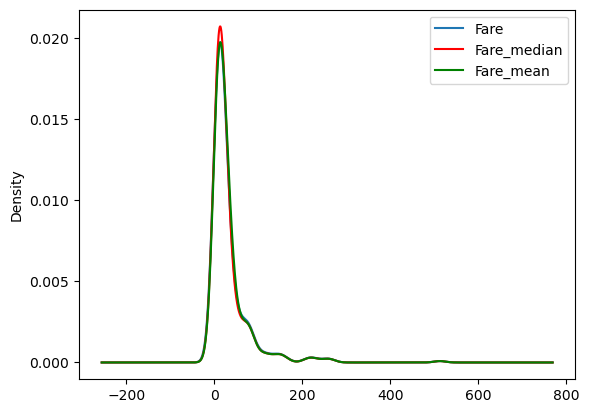

In [17]:
fig=plt.figure()
ax=fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde',ax=ax)


# variable imputed eith the median
x_train['Fare_median'].plot(kind='kde',ax=ax,color='red')

# varible imputed with the mean
x_train['Fare_mean'].plot(kind='kde',ax=ax,color='green')

# add legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [18]:
x_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [19]:
x_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<Axes: >

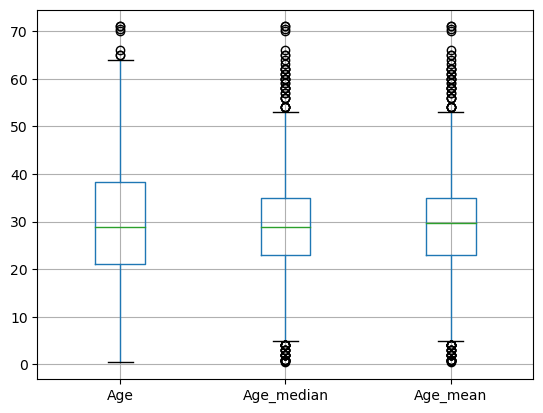

In [20]:
x_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

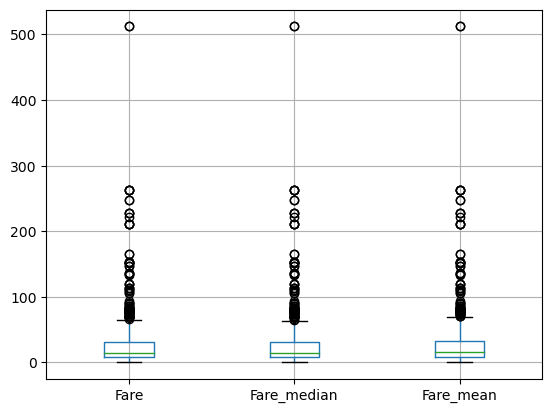

In [21]:
x_train[['Fare','Fare_median','Fare_mean']].boxplot()

# Using Sklearn

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [24]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [25]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [26]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [27]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [28]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [29]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])